In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import findspark
findspark.init()

In [54]:
!pip install pyspark

You should consider upgrading via the 'c:\users\yiry\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [55]:
!pip install findspark

You should consider upgrading via the 'c:\users\yiry\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [56]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row, types as T, functions as F
from pyspark import *
from pyspark.sql.functions import col,isnan, when, count, concat, lit
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
spark=SparkSession.builder.getOrCreate()

In [57]:
#root = 'C:/Users/Yiry/Dropbox/SPARK/Data/'
df=spark.read.options(header="True",inferSchema="True").csv( "census-income.csv")

In [58]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- class of worker: string (nullable = true)
 |-- industry code: integer (nullable = true)
 |-- occupation code: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- wage per hour: integer (nullable = true)
 |-- enrolled in edu inst last wk: string (nullable = true)
 |-- marital status: string (nullable = true)
 |-- major industry code: string (nullable = true)
 |-- major occupation code: string (nullable = true)
 |-- mace: string (nullable = true)
 |-- hispanic Origin: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- member of a labor union: string (nullable = true)
 |-- reason for unemployment: string (nullable = true)
 |-- full or part time employment stat: string (nullable = true)
 |-- capital gains: integer (nullable = true)
 |-- capital losses: integer (nullable = true)
 |-- divdends from stocks: integer (nullable = true)
 |-- federal income tax liability: string (nullable = true)
 |-- tax filer status:

In [59]:
df.count()

199523

In [60]:
len(df.columns)

42

In [61]:
adult_df = df.filter(df['age'] >= 18)
print("Number of row: {}".format(adult_df.count()))

Number of row: 143531


In [62]:
adult_df.select('income','class of worker','industry code','occupation code','education','wage per hour','enrolled in edu inst last wk').show(10)

+------+--------------------+-------------+---------------+--------------------+-------------+----------------------------+
|income|     class of worker|industry code|occupation code|           education|wage per hour|enrolled in edu inst last wk|
+------+--------------------+-------------+---------------+--------------------+-------------+----------------------------+
|-50000|     Not in universe|            0|              0| High school grad...|            0|             Not in universe|
|-50000| Self-employed-no...|            4|             34| Some college but...|            0|             Not in universe|
|-50000|     Not in universe|            0|              0|          10th grade|            0|                 High school|
|-50000|             Private|           40|             10| Some college but...|         1200|             Not in universe|
|-50000|             Private|           34|              3| Bachelors degree...|            0|             Not in universe|
|-50000|

In [63]:
df.select('marital status','major industry code','mace','hispanic Origin','sex','member of a labor union').show(10)

+--------------------+--------------------+--------------------+---------------+-------+-----------------------+
|      marital status| major industry code|                mace|hispanic Origin|    sex|member of a labor union|
+--------------------+--------------------+--------------------+---------------+-------+-----------------------+
|             Widowed| Not in universe ...|               White|      All other| Female|        Not in universe|
|            Divorced|        Construction|               White|      All other|   Male|        Not in universe|
|       Never married| Not in universe ...| Asian or Pacific...|      All other| Female|        Not in universe|
|       Never married| Not in universe ...|               White|      All other| Female|        Not in universe|
|       Never married| Not in universe ...|               White|      All other| Female|        Not in universe|
| Married-civilian...|       Entertainment| Amer Indian Aleu...|      All other| Female|        

In [64]:
df.select('reason for unemployment','full or part time employment stat','capital gains','capital losses','divdends from stocks').show(10)

+-----------------------+---------------------------------+-------------+--------------+--------------------+
|reason for unemployment|full or part time employment stat|capital gains|capital losses|divdends from stocks|
+-----------------------+---------------------------------+-------------+--------------+--------------------+
|        Not in universe|               Not in labor force|            0|             0|                   0|
|        Not in universe|              Children or Arme...|            0|             0|                   0|
|        Not in universe|               Not in labor force|            0|             0|                   0|
|        Not in universe|              Children or Arme...|            0|             0|                   0|
|        Not in universe|              Children or Arme...|            0|             0|                   0|
|        Not in universe|              Full-time schedules|            0|             0|                   0|
|        N

In [65]:
df.select('federal income tax liability','tax filer status','region of previous residence','state of previous residence').show(10)

+----------------------------+----------------+----------------------------+---------------------------+
|federal income tax liability|tax filer status|region of previous residence|state of previous residence|
+----------------------------+----------------+----------------------------+---------------------------+
|                    Nonfiler| Not in universe|             Not in universe|        Other Rel 18+ ev...|
|           Head of household|           South|                    Arkansas|                Householder|
|                    Nonfiler| Not in universe|             Not in universe|        Child 18+ never ...|
|                    Nonfiler| Not in universe|             Not in universe|        Child <18 never ...|
|                    Nonfiler| Not in universe|             Not in universe|        Child <18 never ...|
|         Joint both under 65| Not in universe|             Not in universe|        Spouse of househ...|
|         Joint both under 65| Not in universe|        

In [66]:
df.select('detailed household and family stat','migration code-change in msa','migration code-change in reg','migration code-move within reg').show(10)

+----------------------------------+----------------------------+----------------------------+------------------------------+
|detailed household and family stat|migration code-change in msa|migration code-change in reg|migration code-move within reg|
+----------------------------------+----------------------------+----------------------------+------------------------------+
|               Other relative o...|                           ?|                           ?|           Not in universe ...|
|                       Householder|                 Same county|                 Same county|                            No|
|                 Child 18 or older|                           ?|                           ?|           Not in universe ...|
|               Child under 18 n...|                    Nonmover|                    Nonmover|                           Yes|
|               Child under 18 n...|                    Nonmover|                    Nonmover|                        

In [67]:
df.select('live in this house 1 year ago','instance weight','family members under 18','total person earnings','country of birth father').show(10)

+-----------------------------+---------------+-----------------------+---------------------+-----------------------+
|live in this house 1 year ago|instance weight|family members under 18|total person earnings|country of birth father|
+-----------------------------+---------------+-----------------------+---------------------+-----------------------+
|                            ?|              ?|                      0|      Not in universe|          United-States|
|                          Yes|     MSA to MSA|                      1|      Not in universe|          United-States|
|                            ?|              ?|                      0|      Not in universe|                Vietnam|
|              Not in universe|       Nonmover|                      0|  Both parents pre...|          United-States|
|              Not in universe|       Nonmover|                      0|  Both parents pre...|          United-States|
|                            ?|              ?|         

In [68]:
df.select('country of birth mother','country of birth self','citizenship','total person income').show(10)

+-----------------------+---------------------+--------------------+-------------------+
|country of birth mother|country of birth self|         citizenship|total person income|
+-----------------------+---------------------+--------------------+-------------------+
|          United-States|        United-States| Native- Born in ...|                  0|
|          United-States|        United-States| Native- Born in ...|                  0|
|                Vietnam|              Vietnam| Foreign born- No...|                  0|
|          United-States|        United-States| Native- Born in ...|                  0|
|          United-States|        United-States| Native- Born in ...|                  0|
|          United-States|        United-States| Native- Born in ...|                  2|
|          United-States|        United-States| Native- Born in ...|                  0|
|          United-States|        United-States| Native- Born in ...|                  0|
|          United-Sta

In [69]:
df.select('own business or self employed','taxable income amount','hours per week','veterans benefits').show(10)

+-----------------------------+---------------------+--------------+-----------------+
|own business or self employed|taxable income amount|hours per week|veterans benefits|
+-----------------------------+---------------------+--------------+-----------------+
|              Not in universe|                    2|             0|               95|
|              Not in universe|                    2|            52|               94|
|              Not in universe|                    2|             0|               95|
|              Not in universe|                    0|             0|               94|
|              Not in universe|                    0|             0|               94|
|              Not in universe|                    2|            52|               95|
|              Not in universe|                    2|            52|               94|
|              Not in universe|                    2|            30|               95|
|              Not in universe|            

In [70]:
adult_df = adult_df.replace(' ?', None)
adult_df = adult_df.replace('Not in universe', None)
adult_df = adult_df.replace(' Not in universe', None)
adult_df = adult_df.replace(' Not in universe or children', None)

In [71]:
count_null = adult_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in adult_df.columns])
for i in count_null.columns:
    if count_null.select(i).collect()[0][0] != 0:
        print('Number null value in {}: {}'.format(i,count_null.select(i).collect()[0][0]))

Number null value in class of worker: 46996
Number null value in enrolled in edu inst last wk: 136243
Number null value in major industry code: 47189
Number null value in major occupation code: 47189
Number null value in member of a labor union: 124912
Number null value in reason for unemployment: 137993
Number null value in tax filer status: 132083
Number null value in region of previous residence: 132617
Number null value in instance weight: 71811
Number null value in migration code-change in msa: 71811
Number null value in migration code-change in reg: 71811
Number null value in live in this house 1 year ago: 132083
Number null value in total person earnings: 143531
Number null value in country of birth father: 5538
Number null value in country of birth mother: 5003
Number null value in country of birth self: 2957
Number null value in own business or self employed: 141550


In [72]:
df_Columns=["enrolled in edu inst last wk",
            "member of a labor union",
            "reason for unemployment",
            "tax filer status",
            'region of previous residence',
            'live in this house 1 year ago',
            'total person earnings',
            'own business or self employed'
           ]

In [73]:
adult_df = adult_df.drop(*df_Columns)
print("Number of collumns: {}".format(len(adult_df.columns)))

Number of collumns: 34


In [74]:
columns = ['class of worker','major occupation code','major industry code','instance weight','migration code-change in msa','migration code-change in reg']
for column in columns:
    adult_df = adult_df.withColumn(column,F.when(col(column).isNull(),'None').otherwise(F.col(column)))

In [75]:
pandasdf = adult_df.toPandas()
pandasdf.head()

,age,class of worker,industry code,occupation code,education,wage per hour,marital status,major industry code,major occupation code,mace,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,total person income,taxable income amount,hours per week,veterans benefits,income
0,73,None,0,0,High school graduate,0,Widowed,None,None,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,-50000
2,18,None,0,0,10th grade,0,Never married,None,None,Asian or Pacific Islander,...,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,-50000
3,48,Private,40,10,Some college but no degree,1200,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,...,1,Philippines,United-States,United-States,Native- Born in the United States,2,2,52,95,-50000
4,42,Private,34,3,Bachelors degree(BA AB BS),0,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,...,6,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,-50000


<Figure size 720x1080 with 0 Axes>

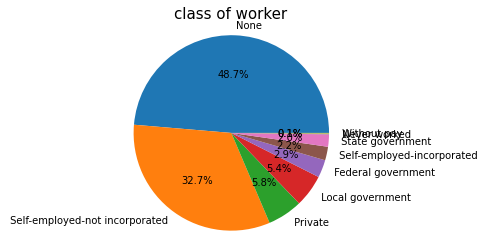

In [76]:
var = "class of worker"
plt.figure(figsize=(10, 15))
labels = pandasdf[var].unique()
sizes = [pandasdf[var].value_counts()[0],
         pandasdf[var].value_counts()[1],
         pandasdf[var].value_counts()[2],
         pandasdf[var].value_counts()[3],
         pandasdf[var].value_counts()[4],
         pandasdf[var].value_counts()[5],
         pandasdf[var].value_counts()[6],
         pandasdf[var].value_counts()[7],
         pandasdf[var].value_counts()[8]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=15);
plt.show()

In [77]:
adult_df = adult_df.na.drop()

In [78]:
print("Number of row: {}".format(adult_df.count()))

Number of row: 136826


In [79]:
print("Number of columns: {}".format(len(adult_df.columns)))

Number of columns: 34


In [80]:
adult_df = adult_df.withColumn('income', when(adult_df.income == '-50000',0).
                              when(adult_df.income == ' 50000+.',1))
adult_df.select('income').distinct().show()

+------+
|income|
+------+
|     1|
|     0|
+------+



In [81]:
numeric_cols = [i.name for i in adult_df.schema if (type(i.dataType) == T.IntegerType or type(i.dataType) == T.DoubleType) ]
len(numeric_cols), numeric_cols

(14,
 ['age',
  'industry code',
  'occupation code',
  'wage per hour',
  'capital gains',
  'capital losses',
  'divdends from stocks',
  'detailed household summary in household',
  'family members under 18',
  'total person income',
  'taxable income amount',
  'hours per week',
  'veterans benefits',
  'income'])

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
def corr(df):
    vector_col = "corr_features"
    assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col)
    df_vector = assembler.transform(df).select(vector_col)

    # get correlation matrix
    matrix = Correlation.corr(df_vector, vector_col)
    return matrix.collect()[0]["pearson({})".format(vector_col)].values[1]

In [84]:
for cols in numeric_cols:
    print('Correlation {} ~ income: {}'.format(cols,corr(adult_df.select([cols,'income']))))

Correlation age ~ income: 0.030237055671732307
Correlation industry code ~ income: 0.13769485386942845
Correlation occupation code ~ income: -0.06594896514002682
Correlation wage per hour ~ income: 0.005655478269135651
Correlation capital gains ~ income: 0.2341283178107934
Correlation capital losses ~ income: 0.1385568198829209
Correlation divdends from stocks ~ income: 0.16783592500201036
Correlation detailed household summary in household ~ income: 0.008041787215171839
Correlation family members under 18 ~ income: 0.17174989316037165
Correlation total person income ~ income: 0.012417869564819915
Correlation taxable income amount ~ income: -0.014181939364955497
Correlation hours per week ~ income: 0.21138779808022037
Correlation veterans benefits ~ income: 0.017418923227909156
Correlation income ~ income: 1.0000000000000002


In [85]:
string_cols = [i.name for i in adult_df.schema if type(i.dataType) == T.StringType]

In [86]:
len(string_cols), string_cols

(20,
 ['class of worker',
  'education',
  'marital status',
  'major industry code',
  'major occupation code',
  'mace',
  'hispanic Origin',
  'sex',
  'full or part time employment stat',
  'federal income tax liability',
  'state of previous residence',
  'detailed household and family stat',
  'instance weight',
  'migration code-change in msa',
  'migration code-change in reg',
  'migration code-move within reg',
  'country of birth father',
  'country of birth mother',
  'country of birth self',
  'citizenship'])

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [88]:
pandasdf = adult_df.toPandas()
pandasdf.head()

,age,class of worker,industry code,occupation code,education,wage per hour,marital status,major industry code,major occupation code,mace,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,total person income,taxable income amount,hours per week,veterans benefits,income
0,73,None,0,0,High school graduate,0,Widowed,None,None,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0
2,18,None,0,0,10th grade,0,Never married,None,None,Asian or Pacific Islander,...,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0
3,48,Private,40,10,Some college but no degree,1200,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,...,1,Philippines,United-States,United-States,Native- Born in the United States,2,2,52,95,0
4,42,Private,34,3,Bachelors degree(BA AB BS),0,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,...,6,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,0


In [89]:
anova=ols('income ~ Q("class of worker") + education + Q("marital status") + Q("major industry code") + Q("major occupation code") + mace + Q("hispanic Origin") + sex + Q("full or part time employment stat") + Q("federal income tax liability") + Q("state of previous residence") + Q("detailed household and family stat") + Q("instance weight") + Q("migration code-change in msa") + Q("migration code-change in reg") + Q("migration code-move within reg") + Q("country of birth father") + Q("country of birth mother") + Q("country of birth self") + citizenship', data=pandasdf).fit()
print(sm.stats.anova_lm(anova, typ=2))

                                              sum_sq        df            F  \
Q("class of worker")                        0.006988       8.0     0.014468   
education                                 498.757282      15.0   550.721704   
Q("marital status")                        12.108608       6.0    33.425444   
Q("major industry code")                    0.020091      23.0     0.014468   
Q("major occupation code")                  0.012229      14.0     0.014468   
mace                                        1.600096       4.0     6.625525   
Q("hispanic Origin")                        1.533008       9.0     2.821215   
sex                                        84.651524       1.0  1402.067697   
Q("full or part time employment stat")      4.699464       7.0    11.119480   
Q("federal income tax liability")           9.024047       5.0    29.892729   
Q("state of previous residence")            3.764846      21.0     2.969355   
Q("detailed household and family stat")     0.244318

c:\users\yiry\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\yiry\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 23, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\yiry\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\users\yiry\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full ra

In [90]:
df_Columns=["wage per hours",
            "detail household sumary in household",
            "class of worker",
            "education",
            "major industry code",
            "major occupation",
            "detailed household and family stat",
            "instance weight",
            "migration code-change in msa",
            "migration code-change in reg",
            "migration code-move within reg",
            "country of birth self, citizenship"
           ]
data = adult_df.drop(*df_Columns)
print("Number of collumns: {}".format(len(data.columns)))
print("Number of row: {}".format(data.count()))

Number of collumns: 26
Number of row: 136826


In [91]:
traindataset, testdataset = data.randomSplit((0.8, 0.2))

In [92]:
traindataset.count()

109844

In [93]:
testdataset.count()

26982

In [94]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, MultilayerPerceptronClassifier, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.pipeline import Pipeline

In [95]:
numeric_cols = [i.name for i in data.schema if (type(i.dataType) == T.IntegerType or type(i.dataType) == T.DoubleType) ]
len(numeric_cols), numeric_cols

(14,
 ['age',
  'industry code',
  'occupation code',
  'wage per hour',
  'capital gains',
  'capital losses',
  'divdends from stocks',
  'detailed household summary in household',
  'family members under 18',
  'total person income',
  'taxable income amount',
  'hours per week',
  'veterans benefits',
  'income'])

In [96]:
numeric_cols.remove('income')

In [97]:
numeric_cols

['age',
 'industry code',
 'occupation code',
 'wage per hour',
 'capital gains',
 'capital losses',
 'divdends from stocks',
 'detailed household summary in household',
 'family members under 18',
 'total person income',
 'taxable income amount',
 'hours per week',
 'veterans benefits']

In [98]:
string_cols = [i.name for i in data.schema if type(i.dataType) == T.StringType]
len(string_cols), string_cols

(12,
 ['marital status',
  'major occupation code',
  'mace',
  'hispanic Origin',
  'sex',
  'full or part time employment stat',
  'federal income tax liability',
  'state of previous residence',
  'country of birth father',
  'country of birth mother',
  'country of birth self',
  'citizenship'])

In [99]:
indexer = StringIndexer(inputCols=string_cols, outputCols=[s + '_Ind' for s in string_cols])
encoder = OneHotEncoder(inputCols=[s + '_Ind' for s in string_cols], outputCols=[s + '_Vector' for s in string_cols])
assembler = VectorAssembler(inputCols=[s + '_Vector' for s in string_cols] + numeric_cols, outputCol="raw_features")
standard_scaler = StandardScaler(inputCol="raw_features", outputCol="features")

# Muilti class

In [100]:
layers = [20, 50, 2]
nn = MultilayerPerceptronClassifier(labelCol='income',
                                            featuresCol='features',
                                            maxIter=200,
                                            layers=layers,
                                            blockSize=128,
                                            seed=1234)
nn_pipeline = Pipeline(stages=[indexer, encoder, assembler, standard_scaler, nn])

In [101]:
model = nn_pipeline.fit(traindataset)
nn_output = model.transform(testdataset)

In [102]:
nn_prediction = nn_output.select('prediction', 'income')

# Logistic regression

In [103]:
logistic = LogisticRegression(labelCol='income',featuresCol='features')
log_pipeline = Pipeline(stages=[indexer, encoder, assembler, standard_scaler, logistic])

In [104]:
log_model = log_pipeline.fit(traindataset)
log_output = log_model.transform(testdataset)

In [105]:
logis_prediction = log_output.select('prediction', 'income')

In [106]:
metrics = ['weightedPrecision', 'weightedRecall', 'f1']
for metric in metrics:
    evaluator = MulticlassClassificationEvaluator(metricName=metric,labelCol = 'income')
    print(metric + ' = ' + str(evaluator.evaluate(logis_prediction)))
    

weightedPrecision = 0.914828005982901
weightedRecall = 0.9269883626121118
f1 = 0.9127360343150959


# Random forest

In [107]:
random = RandomForestClassifier(labelCol='income',featuresCol='features')
ran_pipeline = Pipeline(stages=[indexer, encoder, assembler, standard_scaler, random])

In [108]:
ran_model = ran_pipeline.fit(traindataset)
ran_output = ran_model.transform(testdataset)

In [109]:
ran_prediction = ran_output.select('prediction', 'income')

In [110]:
metrics = ['weightedPrecision', 'weightedRecall', 'f1']
for metric in metrics:
    evaluator = MulticlassClassificationEvaluator(metricName=metric,labelCol = 'income')
    print(metric + ' = ' + str(evaluator.evaluate(ran_prediction)))
    

weightedPrecision = 0.8330570515001006
weightedRecall = 0.9127195908383366
f1 = 0.8710707575646


# Decision Tree

In [111]:
decision = DecisionTreeClassifier(labelCol='income',featuresCol='features')
dec_pipeline = Pipeline(stages=[indexer, encoder, assembler, standard_scaler, decision])

In [112]:
dec_model = dec_pipeline.fit(traindataset)
dec_output = dec_model.transform(testdataset)

In [113]:
dec_prediction = dec_output.select('prediction', 'income')

In [ ]:
metrics = ['weightedPrecision', 'weightedRecall', 'f1']
for metric in metrics:
    evaluator = MulticlassClassificationEvaluator(metricName=metric,labelCol = 'income')
    print(metric + ' = ' + str(evaluator.evaluate(dec_prediction)))
    

weightedPrecision = 0.9114978263913809
weightedRecall = 0.9249870283892966
